In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest, getCountDFbyPrefix, get_annotated_countDF

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [3]:
# Read in the count data by Kaz

datasetFolder = '../data/220509-30-for-bud-count-Kaz/sg-Serpinh1/'

files = glob.glob(os.path.join(datasetFolder, '*fileNameRecord.txt'))

datasetPrefixes = []
for f in files:
    datasetPrefixes.append('-'.join(os.path.basename(f).split('-')[:3]))

sgRNAs = ["sg-Control"]*5 + ["sg1-Serpinh1"]*5 + ["sg2-Serpinh1"]*5 + ["sg3-Serpinh1"]*5
dfs = []
for datasetPrefix in datasetPrefixes:
    dfs.append( get_annotated_countDF(datasetPrefix, datasetFolder, sgRNAs) )

df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)
df_Kaz = df

In [4]:
# Read in the count data by Rei

datasetFolder = '../data/220509-30-for-bud-count-Rei/sg-Serpinh1/'

files = glob.glob(os.path.join(datasetFolder, '*fileNameRecord.txt'))

datasetPrefixes = []
for f in files:
    datasetPrefixes.append('-'.join(os.path.basename(f).split('-')[:3]))

sgRNAs = ["sg-Control"]*5 + ["sg1-Serpinh1"]*5 + ["sg2-Serpinh1"]*5 + ["sg3-Serpinh1"]*5
dfs = []
for datasetPrefix in datasetPrefixes:
    dfs.append( get_annotated_countDF(datasetPrefix, datasetFolder, sgRNAs) )

df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)
df_Rei = df

In [5]:
# Merge the two data set and compare the countings of Rei and Kaz
df_Kaz.rename(columns={'counts': 'counts_Kaz'}, inplace=True)
df_Rei.rename(columns={'counts': 'counts_Rei'}, inplace=True)
df = df_Kaz.merge(df_Rei, on=['file_name',
                              'scrambled_file_name',
                              'sample_id',
                              'sgRNA',
                              'time_d',
                              'groups'])
df.head()

,file_name,scrambled_file_name,counts_Kaz,sample_id,sgRNA,time_d,groups,counts_Rei
0,Plate07152021_WellD02_ChannelMono_Seq0000.nd2,669d18242fcdaf1429a422fc4e401af6.nd2,39,plateA_4_01,sg-Control,4,sg-Control_4,43
1,Plate07152021_WellD03_ChannelMono_Seq0001.nd2,bf1d157d911c44a0642fbc41c639b031.nd2,37,plateA_4_02,sg-Control,4,sg-Control_4,35
2,Plate07152021_WellD04_ChannelMono_Seq0002.nd2,5fce83b0645448351e9b0488c1e3c166.nd2,41,plateA_4_03,sg-Control,4,sg-Control_4,42
3,Plate07152021_WellD05_ChannelMono_Seq0003.nd2,7768efe88f11214422878ef25babcce4.nd2,32,plateA_4_04,sg-Control,4,sg-Control_4,33
4,Plate07152021_WellD06_ChannelMono_Seq0004.nd2,dc148d84f899a1559723595be1c2b7e4.nd2,34,plateA_4_05,sg-Control,4,sg-Control_4,37


In [6]:
# calculate average counting data
df['counts'] = (df['counts_Rei'] + df['counts_Kaz']) / 2

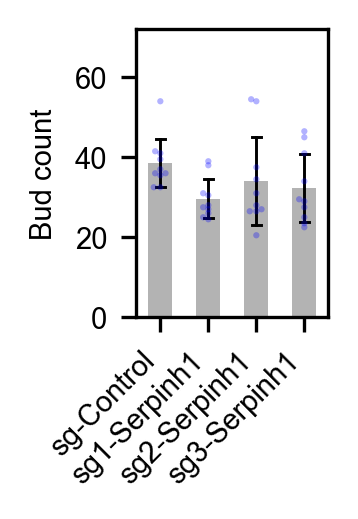

In [12]:
# Make plot for figure

fig_width, fig_height = 0.8, 1.2 # inches

line_width = .8
output_prefix = '220516-plateAD-E13-d4-sg-Serpinh1'
outputFigPath = '../jupyter_figures/' + output_prefix + '.svg'
# outputFigPath = '../jupyter_figures/' + output_prefix + '.tif'

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
# ax = fig.add_axes([0.28, 0.35, 0.67, 0.6])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

sns.swarmplot(data = df,
              x = 'sgRNA', y = 'counts',
              color = 'blue',
              alpha = 0.3,
              size = 1.5
             )
sns.barplot(data = df,
            x = 'sgRNA', y = 'counts',
            ci = 'sd',
            color=".7", # This a nicer looking lighter gray to my own taste
            errwidth=.7, errcolor="k", capsize=.2)

plt.ylim(0, 72)
change_bar_width(ax, .5)

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

plt.xlabel("")
plt.ylabel("Bud count")

# ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)

In [10]:
tukeyTest(df.counts, df.sgRNA)

Summary of test:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
  sg-Control sg1-Serpinh1     -8.9 0.0995 -18.9758  1.1758  False
  sg-Control sg2-Serpinh1    -4.55 0.6083 -14.6258  5.5258  False
  sg-Control sg3-Serpinh1     -6.2 0.3613 -16.2758  3.8758  False
sg1-Serpinh1 sg2-Serpinh1     4.35 0.6378  -5.7258 14.4258  False
sg1-Serpinh1 sg3-Serpinh1      2.7 0.8814  -7.3758 12.7758  False
sg2-Serpinh1 sg3-Serpinh1    -1.65    0.9 -11.7258  8.4258  False
-----------------------------------------------------------------
p values of all pair-wise tests:
 [0.09949495 0.60830769 0.36127151 0.63782576 0.88135394 0.9       ]


In [11]:
for i in df.sgRNA.unique():
    print(i, 'n =', len(df[df.sgRNA==i]))

sg-Control n = 10
sg1-Serpinh1 n = 10
sg2-Serpinh1 n = 10
sg3-Serpinh1 n = 10
